<a href="https://colab.research.google.com/github/shakeelrifathcse/Data_analysis_pract_using_python/blob/main/pandas_practice_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - Pandas Data Analysis Practice



In [3]:
import pandas as pd

In this assignment, we're going to analyze an operate on data from a CSV file. Let's begin by downloading the CSV file.

In [4]:
from urllib.request import urlretrieve

urlretrieve('https://gist.githubusercontent.com/aakashns/28b2e504b3350afd9bdb157893f9725c/raw/994b65665757f4f8887db1c85986a897abb23d84/countries.csv','countries.csv')

('countries.csv', <http.client.HTTPMessage at 0x7ae6882183d0>)

Let's load the data from the CSV file into a Pandas data frame.

In [5]:
c_df = pd.read_csv('countries.csv')
type(c_df)

pandas.core.frame.DataFrame

In [6]:
c_df


,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251


**Q1: How many countries does the dataframe contain?**

Hint: Use the `.shape` method.

In [7]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    210 non-null    object 
 1   continent                   210 non-null    object 
 2   population                  210 non-null    float64
 3   life_expectancy             207 non-null    float64
 4   hospital_beds_per_thousand  164 non-null    float64
 5   gdp_per_capita              183 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.0+ KB


In [8]:
c_df.describe()

,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
count,2.100000e+02,207.000000,164.000000,183.000000
mean,3.694276e+07,73.529855,3.012671,19485.912399
std,1.425092e+08,7.560056,2.464917,19820.802488
min,8.090000e+02,53.280000,0.100000,661.240000
25%,1.031042e+06,69.260000,1.300000,4504.151000
50%,6.909866e+06,75.090000,2.358500,13111.214000
75%,2.615868e+07,78.940000,3.895750,28349.983500
max,1.439324e+09,86.750000,13.800000,116935.600000


In [9]:
c_df.columns

Index(['location', 'continent', 'population', 'life_expectancy',
       'hospital_beds_per_thousand', 'gdp_per_capita'],
      dtype='object')

In [10]:
c_df.shape

(210, 6)

In [11]:
c_df["location"],c_df["population"]

(0         Afghanistan
 1             Albania
 2             Algeria
 3             Andorra
 4              Angola
             ...      
 205           Vietnam
 206    Western Sahara
 207             Yemen
 208            Zambia
 209          Zimbabwe
 Name: location, Length: 210, dtype: object,
 0      38928341.0
 1       2877800.0
 2      43851043.0
 3         77265.0
 4      32866268.0
           ...    
 205    97338583.0
 206      597330.0
 207    29825968.0
 208    18383956.0
 209    14862927.0
 Name: population, Length: 210, dtype: float64)

In [12]:
c_df.location

,location
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
205,Vietnam
206,Western Sahara
207,Yemen
208,Zambia


In [13]:
a = c_df[["location","population"]].head(10)
a


,location,population
0,Afghanistan,38928341.0
1,Albania,2877800.0
2,Algeria,43851043.0
3,Andorra,77265.0
4,Angola,32866268.0
5,Anguilla,15002.0
6,Antigua and Barbuda,97928.0
7,Argentina,45195777.0
8,Armenia,2963234.0
9,Aruba,106766.0


In [14]:
type(c_df["population"])

pandas.core.series.Series

In [15]:
num_countries = c_df.shape


In [16]:
print('There are {} countries in the dataset'.format(num_countries))

There are (210, 6) countries in the dataset


**Q2: Retrieve a list of continents from the dataframe?**

*Hint: Use the `.unique` method of a series.*

In [17]:
# prompt: Retrieve a list of continents from the dataframe?

continents = c_df['continent'].unique()
print(continents)

['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


In [18]:
a = c_df.at[1,"continent"]
b = c_df["continent"][1]
print(a,b)

Europe Europe


**Q3: What is the total population of all the countries listed in this dataset?**

In [19]:
total_population = c_df["population"].sum()

In [20]:
print('The total population is {}.'.format(total_population))
type(total_population)

The total population is 7757980095.0.


numpy.float64

**Q: (Optional) What is the overall life expectancy across in the world?**

*Hint: You'll need to take a weighted average of life expectancy using populations as weights.*

In [21]:
c_df[["location","population","life_expectancy"]].head(10)

,location,population,life_expectancy
0,Afghanistan,38928341.0,64.83
1,Albania,2877800.0,78.57
2,Algeria,43851043.0,76.88
3,Andorra,77265.0,83.73
4,Angola,32866268.0,61.15
5,Anguilla,15002.0,81.88
6,Antigua and Barbuda,97928.0,77.02
7,Argentina,45195777.0,76.67
8,Armenia,2963234.0,75.09
9,Aruba,106766.0,76.29


In [22]:
c_df.loc[c_df['location'] == 'India', 'life_expectancy']


,life_expectancy
90,69.66


In [23]:
# What is the overall life expectancy across in the world?

le_world = (((c_df["population"] * c_df["life_expectancy"]).sum()) / c_df["population"].sum())

a = int(le_world)

print(f"the overall life expectancy across in the world is average of {a} age")

the overall life expectancy across in the world is average of 72 age


**Q4: Create a dataframe containing 10 countries with the highest population.**

*Hint: Chain the `sort_values` and `head` methods.*

In [24]:


top_10_countries = c_df.sort_values('population', ascending=False).head(10)
top_10_countries = top_10_countries[['location', 'population']]

top_10_countries

,location,population
41,China,1.439324e+09
90,India,1.380004e+09
199,United States,3.310026e+08
91,Indonesia,2.735236e+08
145,Pakistan,2.208923e+08
27,Brazil,2.125594e+08
141,Nigeria,2.061396e+08
15,Bangladesh,1.646894e+08
157,Russia,1.459345e+08
125,Mexico,1.289328e+08


**Q5: Add a new column in `countries_df` to record the overall GDP per country (product of population & per capita GDP).**



In [25]:
c_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251


In [26]:
c_df['gdp'] = c_df['population'] * c_df['gdp_per_capita']
c_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,gdp
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987,7.022622e+10
1,Albania,Europe,2877800.0,78.57,2.89,11803.431,3.396791e+10
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839,6.101364e+11
3,Andorra,Europe,77265.0,83.73,NaN,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495,1.912651e+11
...,...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884,6.007624e+11
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147,4.411699e+10
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251,6.782303e+10


**Q: (Optional) Create a dataframe containing 10 countries with the lowest GDP per capita, among the counties with population greater than 100 million.**

In [27]:
top_10_countries_with_lowest_gdp = c_df[c_df['population'] > 100000000].sort_values('gdp_per_capita').head(10)
top_10_countries_with_lowest_gdp

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,gdp
63,Ethiopia,Africa,1.149636e+08,66.60,0.30,1729.927,1.988786e+11
15,Bangladesh,Asia,1.646894e+08,72.59,0.80,3523.984,5.803628e+11
145,Pakistan,Asia,2.208923e+08,67.27,0.60,5034.708,1.112128e+12
141,Nigeria,Africa,2.061396e+08,54.69,NaN,5338.454,1.100467e+12
90,India,Asia,1.380004e+09,69.66,0.53,6426.674,8.868838e+12
151,Philippines,Asia,1.095811e+08,71.23,1.00,7599.188,8.327273e+11
58,Egypt,Africa,1.023344e+08,71.99,1.60,10550.206,1.079649e+12
91,Indonesia,Asia,2.735236e+08,71.72,1.04,11188.744,3.060386e+12
27,Brazil,South America,2.125594e+08,75.88,2.20,14103.452,2.997821e+12
41,China,Asia,1.439324e+09,76.91,4.34,15308.712,2.203419e+13


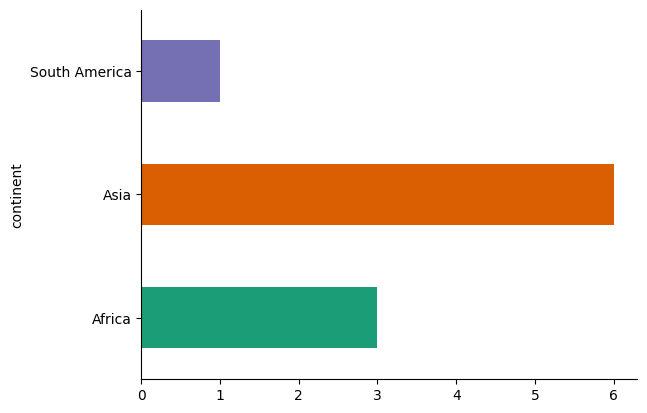

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
top_10_countries_with_lowest_gdp.groupby('continent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Q6: Create a data frame that counts the number countries in each continent?**

*Hint: Use `groupby`, select the `location` column and aggregate using `count`.*

In [29]:
country_counts_df_contient = c_df.groupby('continent')['location'].count()
country_counts_df_contient

,location
continent,
Africa,55
Asia,47
Europe,51
North America,36
Oceania,8
South America,13


**Q7: Create a data frame showing the total population of each continent.**

*Hint: Use `groupby`, select the population column and aggregate using `sum`.*

In [30]:
continent_populations_df = c_df.groupby('continent')['population'].sum()


In [31]:

continent_populations_df = continent_populations_df.sort_values()
continent_populations_df

,population
continent,
Oceania,4.095832e+07
South America,4.304611e+08
North America,5.912425e+08
Europe,7.485062e+08
Africa,1.339424e+09
Asia,4.607388e+09


Let's download another CSV file containing overall Covid-19 stats for various countires, and read the data into another Pandas data frame.

In [32]:
urlretrieve('https://gist.githubusercontent.com/aakashns/b2a968a6cfd9fbbb0ff3d6bd0f26262b/raw/b115ed1dfa17f10fc88bf966236cd4d9032f1df8/covid-countries-data.csv','covid-countries-data.csv')

('covid-countries-data.csv', <http.client.HTTPMessage at 0x7ae674e485e0>)

In [33]:
covid_data_df = pd.read_csv('covid-countries-data.csv')

In [34]:
covid_data_df

,location,total_cases,total_deaths,total_tests
0,Afghanistan,38243.0,1409.0,NaN
1,Albania,9728.0,296.0,NaN
2,Algeria,45158.0,1525.0,NaN
3,Andorra,1199.0,53.0,NaN
4,Angola,2729.0,109.0,NaN
...,...,...,...,...
207,Western Sahara,766.0,1.0,NaN
208,World,26059065.0,863535.0,NaN
209,Yemen,1976.0,571.0,NaN
210,Zambia,12415.0,292.0,NaN


**Q8: Count the number of countries for which the `total_tests` data is missing.**

*Hint: Use the `.isna` method.*

In [42]:
total_tests_missing = covid_data_df['total_tests'].isna().sum()

total_tests_missing

122

In [43]:
print("The data for total tests is missing for {} countries.".format(int(total_tests_missing)))

The data for total tests is missing for 122 countries.


Let's merge the two data frames, and compute some more metrics.

**Q9: Merge `countries_df` with `covid_data_df` on the `location` column.**

*Hint: Use the `.merge` method on `countries_df`.

In [51]:
combined_df = c_df.merge(covid_data_df, on = "location")

c_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,gdp
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987,7.022622e+10
1,Albania,Europe,2877800.0,78.57,2.89,11803.431,3.396791e+10
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839,6.101364e+11
3,Andorra,Europe,77265.0,83.73,NaN,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495,1.912651e+11
...,...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884,6.007624e+11
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147,4.411699e+10
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251,6.782303e+10


In [49]:
covid_data_df

,location,total_cases,total_deaths,total_tests
0,Afghanistan,38243.0,1409.0,NaN
1,Albania,9728.0,296.0,NaN
2,Algeria,45158.0,1525.0,NaN
3,Andorra,1199.0,53.0,NaN
4,Angola,2729.0,109.0,NaN
...,...,...,...,...
207,Western Sahara,766.0,1.0,NaN
208,World,26059065.0,863535.0,NaN
209,Yemen,1976.0,571.0,NaN
210,Zambia,12415.0,292.0,NaN


In [56]:
combined_df.sample(10)

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,gdp,total_cases,total_deaths,total_tests
23,Bolivia,South America,11673029.0,71.51,1.100,6885.829,8.037848e+10,117928.0,5203.0,238965.0
11,Austria,Europe,9006400.0,81.54,7.370,45436.686,4.092210e+11,28183.0,734.0,1210568.0
87,Hong Kong,Asia,7496988.0,84.86,NaN,56054.920,4.202431e+11,NaN,NaN,780410.0
181,Swaziland,Africa,1160164.0,60.19,2.100,7738.975,8.978480e+09,4668.0,94.0,NaN
124,Mauritius,Africa,1271767.0,74.99,3.400,20292.745,2.580764e+10,356.0,10.0,NaN
185,Taiwan,Asia,23816775.0,80.46,NaN,NaN,NaN,489.0,7.0,87646.0
119,Malaysia,Asia,32365998.0,76.16,1.900,26808.164,8.676730e+11,9360.0,128.0,1262848.0
118,Malawi,Africa,19129955.0,64.26,1.300,1095.042,2.094810e+10,5579.0,175.0,NaN
164,Saudi Arabia,Asia,34813867.0,75.13,2.700,49045.411,1.707460e+12,317486.0,3956.0,5160518.0
129,Montenegro,Europe,628062.0,76.88,3.861,16409.288,1.030605e+10,5019.0,104.0,NaN


**Q10: Add columns `tests_per_million`, `cases_per_million` and `deaths_per_million` into `combined_df`.**

In [ ]:
combined_df['tests_per_million'] = combined_df['total_tests'] * 1e6 / combined_df['population']

In [ ]:
combined_df['cases_per_million'] = ???

In [ ]:
combined_df['deaths_per_million'] = ???

In [ ]:
combined_df

In [ ]:
jovian.commit(project='pandas-practice-assignment', environment=None)

**Q11: Create a dataframe with 10 countires that have highest number of tests per million people.**

In [ ]:
highest_tests_df = ???

In [ ]:
highest_tests_df

In [ ]:
jovian.commit(project='pandas-practice-assignment', environment=None)

**Q12: Create a dataframe with 10 countires that have highest number of positive cases per million people.**

In [ ]:
highest_cases_df = ???

In [ ]:
highest_cases_df

In [ ]:
jovian.commit(project='pandas-practice-assignment', environment=None)

**Q13: Create a dataframe with 10 countires that have highest number of deaths cases per million people?**

In [ ]:
highest_deaths_df = ???

In [ ]:
highest_deaths_df

In [ ]:
jovian.commit(project='pandas-practice-assignment', environment=None)

**(Optional) Q: Count number of countries that feature in both the lists of "highest number of tests per million" and "highest number of cases per million".**

In [ ]:
jovian.commit(project='pandas-practice-assignment', environment=None)

**(Optional) Q: Count number of countries that feature in both the lists "20 countries with lowest GDP per capita" and "20 countries with the lowest number of hospital beds per thousand population". Only consider countries with a population higher than 10 million while creating the list.**